In [1]:
import pandas
import geopandas as gpd

In [2]:
import fiona
from shapely.geometry import Polygon
import matplotlib.pyplot as plt

#### Map Preprocessing
https://gis.semcog.org/server/rest/services/Hosted/Traffic_Volume__2022/FeatureServer
https://gis.semcog.org/server/rest/services/Hosted/Traffic_Volume__2022/FeatureServer/67

In [59]:
from shapely.geometry import Polygon
import matplotlib.pyplot as plt

In [23]:
T_gdf = gpd.read_file('Map_wV.geojson')

In [35]:
W_gdf = T_gdf[T_gdf['cntname2']=='Washtenaw']

In [47]:
W_gdf = T_gdf[T_gdf['cntname']=='Washtenaw']

In [62]:
lat_point_list = [42.328421,  42.218331041276286, 42.22044042669353, 42.32656307319414, 42.328421]
lon_point_list = [-83.658303, -83.65327677208232, -83.82635282072181, -83.82400716275382,-83.658303]
polygon_geom = Polygon(zip(lon_point_list, lat_point_list))
polygon = gpd.GeoDataFrame(index=[0], crs='epsg:4326', geometry=[polygon_geom])   

<Axes: >

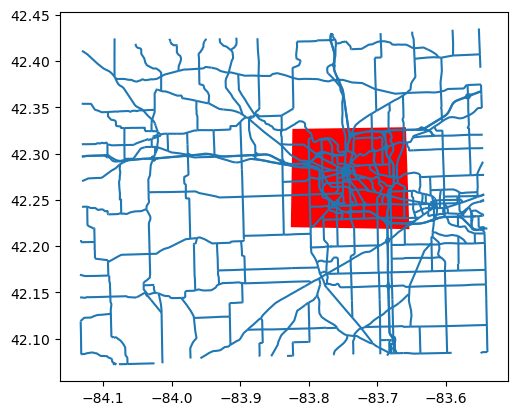

In [63]:
f, ax = plt.subplots()
W_gdf.plot(ax=ax)
polygon.plot(ax=ax, color='red')

<Axes: >

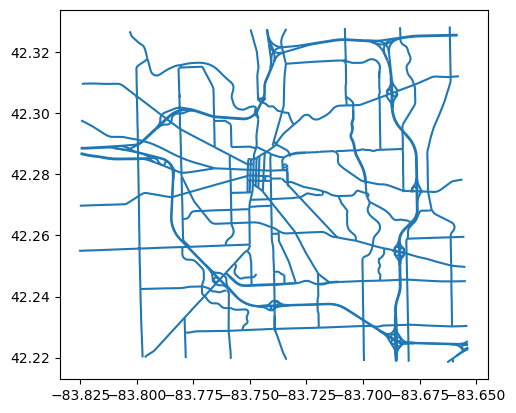

In [66]:
A_gpd = gpd.overlay(W_gdf, polygon, how='intersection')
A_gpd.plot()

In [76]:
A_gpd.to_file("AA_Traffic_Volume.geojson", driver="GeoJSON")

<Axes: >

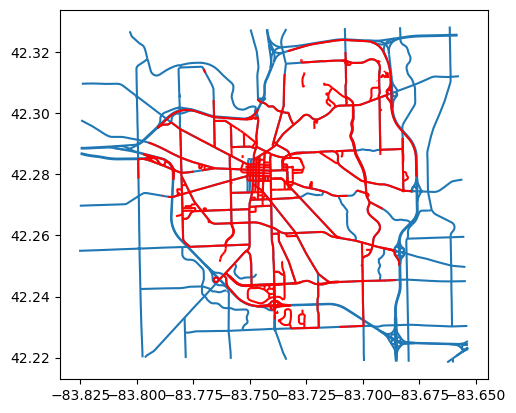

In [80]:
f, ax = plt.subplots()
A_gpd = gpd.read_file('AA_Traffic_Volume.geojson')
A_gpd.plot(ax=ax)
B_gpd = gpd.read_file('nonresidential_network_geopackage.gpkg', layer='edges')
B_gpd.plot(ax=ax, color='red')

In [81]:
C_gpd = gpd.read_file('nonresidential_network_geopackage.gpkg', layer='nodes')

In [82]:
C_gpd

,osmid,y,x,highway,street_count,ref,geometry
0,2692034562,42.230170,-83.706507,traffic_signals,3,,POINT (-83.70651 42.23017)
1,62527491,42.281775,-83.758736,traffic_signals,4,,POINT (-83.75874 42.28177)
2,3165114370,42.307930,-83.707705,,3,,POINT (-83.70770 42.30793)
3,62500869,42.291752,-83.705039,,3,,POINT (-83.70504 42.29175)
4,62527493,42.281797,-83.759832,,3,,POINT (-83.75983 42.28180)
...,...,...,...,...,...,...,...
1141,62554099,42.288948,-83.755702,,4,,POINT (-83.75570 42.28895)
1142,62570486,42.316590,-83.726451,,3,,POINT (-83.72645 42.31659)
1143,62564344,42.242551,-83.741373,,3,,POINT (-83.74137 42.24255)
1144,62527484,42.281426,-83.748499,traffic_signals,4,,POINT (-83.74850 42.28143)


In [84]:
A_gpd.columns

Index(['fid', 'mdot_id', 'cntnum2', 'mpo_id_car', 'pr', 'bmp', 'seg_length',
       'number_lan', 'community2', 'community3', 'community4', 'cond',
       'cntname2', 'nfcname', 'paser', 'lanes', 'sem_id_1', 'sem_id_2',
       'sem_id_3', 'sem_id_4', 'vmt', 'aadt', 'text_aadt', 'cntname',
       'road_name', 'aadtyear', 'surface', 'text_year', 'aadttype',
       'agency_id', 'nfc', 'community', 'aadt_ms2_y', 'semmcd4', 'semmcd3',
       'SHAPE__Length', 'falink_id', 'latest_cou', 'aadtr', 'semmcd2',
       'semmcd1', 'cntnum', 'emp', 'mmp', 'lanemi', 'intrp_aadt', 'speed_sour',
       'posted_spe', 'jurisdicti', 'nfcnum', 'falink_id_', 'aadt_ms2',
       'geometry'],
      dtype='object')

In [143]:
AA_Map = A_gpd[['fid','seg_length','posted_spe','aadt','lanes','geometry']]


In [ ]:
[
        'emp', 'mmp', 'lanemi', 'intrp_aadt', 'speed_sour',
       'posted_spe', 'jurisdicti', 'nfcnum', 'falink_id_', 'aadt_ms2']

In [122]:
A_gpd[['posted_spe', 'jurisdicti', 'nfc','nfcnum', 'falink_id_', 'aadt_ms2']]

,posted_spe,jurisdicti,nfc,nfcnum,falink_id_,aadt_ms2
0,55,State,2,2,7623,0
1,25,City/Village,5,5,8706,0
2,0,City/Village,5,5,7907,0
3,70,State,2,2,7550,0
4,0,County,4,4,8753,0
...,...,...,...,...,...,...
818,0,County,4,4,0,0
819,0,State,2,2,19253,0
820,0,County,5,5,0,0
821,0,City/Village,5,5,19269,0


In [111]:
654.60/0.4

1636.5

In [123]:
A_gpd['posted_spe'].value_counts()


posted_spe
40    151
0     122
35    115
70    103
25     95
45     92
30     52
65     50
55     31
50     12
Name: count, dtype: int64

<Axes: >

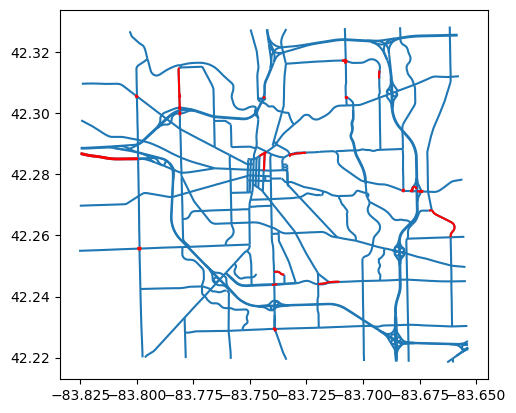

In [136]:
f, ax = plt.subplots()
A_gpd.plot(ax=ax)
A_gpd[A_gpd['posted_spe']==0].plot(ax=ax, color='red')

<Axes: >

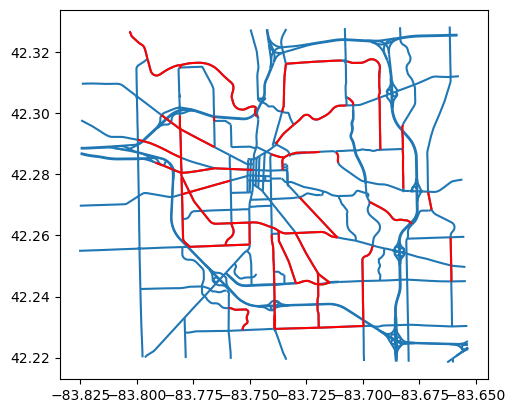

In [142]:
f, ax = plt.subplots()
A_gpd.plot(ax=ax)
A_gpd[A_gpd['posted_spe']==35].plot(ax=ax, color='red')

In [145]:
AA_Map = A_gpd[['fid','seg_length','posted_spe','aadt','lanes','geometry']]
AA_Map

,fid,seg_length,posted_spe,aadt,lanes,geometry
0,4803,0.19,55,12605,3,"LINESTRING (-83.74491 42.30368, -83.74487 42.3..."
1,5011,0.40,25,1628,2,"LINESTRING (-83.75845 42.29633, -83.75859 42.2..."
2,5013,0.01,0,6033,3,"LINESTRING (-83.70721 42.30509, -83.70721 42.3..."
3,5014,0.29,70,16670,2,"LINESTRING (-83.79114 42.29503, -83.79102 42.2..."
4,5029,0.17,0,3560,2,"LINESTRING (-83.78103 42.30230, -83.78109 42.3..."
...,...,...,...,...,...,...
818,22678,0.01,0,8770,1,"LINESTRING (-83.80012 42.30566, -83.80010 42.3..."
819,22681,0.03,0,7848,1,"LINESTRING (-83.74401 42.30481, -83.74380 42.3..."
820,22683,0.01,0,3678,1,"LINESTRING (-83.80019 42.30559, -83.80018 42.3..."
821,22696,0.03,0,3678,2,"LINESTRING (-83.70678 42.30504, -83.70679 42.3..."


In [152]:
for i, row in AA_Map.iterrows():
    if row['posted_spe']==0:
        AA_Map.loc[i,'posted_spe']=35


In [ ]:
.to_file("AA_Traffic_Volume.geojson", driver="GeoJSON")

In [153]:
AA_Map['posted_spe'].value_counts()

posted_spe
35    237
40    151
70    103
25     95
45     92
30     52
65     50
55     31
50     12
Name: count, dtype: int64

In [156]:
AA_Map.to_file("AA_Map.geojson", driver="GeoJSON")

In [160]:
AA_Map.loc[0,'geometry'].coords[-1]

(-83.74359748262053, 42.30638334174418)

In [161]:
print(AA_Map.loc[0,'geometry'])

LINESTRING (-83.74490549635181 42.30367813856756, -83.7448676158465 42.30372329897617, -83.74422249584293 42.30465961454473, -83.74404318370166 42.30500273847155, -83.74388321769283 42.3053144517141, -83.74377967870812 42.3055742127991, -83.74370376537519 42.30582871009893, -83.74368422645217 42.3059040586955, -83.74364447120666 42.30605735678746, -83.74359748262053 42.30638334174418)


#### Map Processing, Number all Nodes

In [66]:
AA = gpd.read_file('AA_Map.geojson')

In [64]:
AA

,fid,seg_length,posted_spe,aadt,lanes,geometry
0,4803,0.19,55,12605,3,"LINESTRING (-83.74491 42.30368, -83.74487 42.3..."
1,5011,0.40,25,1628,2,"LINESTRING (-83.75845 42.29633, -83.75859 42.2..."
2,5013,0.01,35,6033,3,"LINESTRING (-83.70721 42.30509, -83.70721 42.3..."
3,5014,0.29,70,16670,2,"LINESTRING (-83.79114 42.29503, -83.79102 42.2..."
4,5029,0.17,35,3560,2,"LINESTRING (-83.78103 42.30230, -83.78109 42.3..."
...,...,...,...,...,...,...
818,22678,0.01,35,8770,1,"LINESTRING (-83.80012 42.30566, -83.80010 42.3..."
819,22681,0.03,35,7848,1,"LINESTRING (-83.74401 42.30481, -83.74380 42.3..."
820,22683,0.01,35,3678,1,"LINESTRING (-83.80019 42.30559, -83.80018 42.3..."
821,22696,0.03,35,3678,2,"LINESTRING (-83.70678 42.30504, -83.70679 42.3..."


In [65]:
AA['end1_coord'] = AA['geometry'].coords[0]


AttributeError: 'GeoSeries' object has no attribute 'coords'

In [60]:
# Round All Coordinates to 4 decimal points (~11m)
from shapely.wkt import loads
import re

simpledec = re.compile(r"\d*\.\d+")
def mround(match):
    return "{:.3f}".format(float(match.group()))

AA.geometry = AA.geometry.apply(lambda x: loads(re.sub(simpledec, mround, x.wkt)))


In [57]:
AA

,fid,seg_length,posted_spe,aadt,lanes,geometry
0,4803,0.19,55,12605,3,"LINESTRING (-83.74490 42.30370, -83.74490 42.3..."
1,5011,0.40,25,1628,2,"LINESTRING (-83.75850 42.29630, -83.75860 42.2..."
2,5013,0.01,35,6033,3,"LINESTRING (-83.70720 42.30510, -83.70720 42.3..."
3,5014,0.29,70,16670,2,"LINESTRING (-83.79110 42.29500, -83.79100 42.2..."
4,5029,0.17,35,3560,2,"LINESTRING (-83.78100 42.30230, -83.78110 42.3..."
...,...,...,...,...,...,...
818,22678,0.01,35,8770,1,"LINESTRING (-83.80010 42.30570, -83.80010 42.3..."
819,22681,0.03,35,7848,1,"LINESTRING (-83.74400 42.30480, -83.74380 42.3..."
820,22683,0.01,35,3678,1,"LINESTRING (-83.80020 42.30560, -83.80020 42.3..."
821,22696,0.03,35,3678,2,"LINESTRING (-83.70680 42.30500, -83.70680 42.3..."


In [62]:
AA.to_file("AA_Map_Rounded_3.geojson", driver="GeoJSON")

<Axes: >

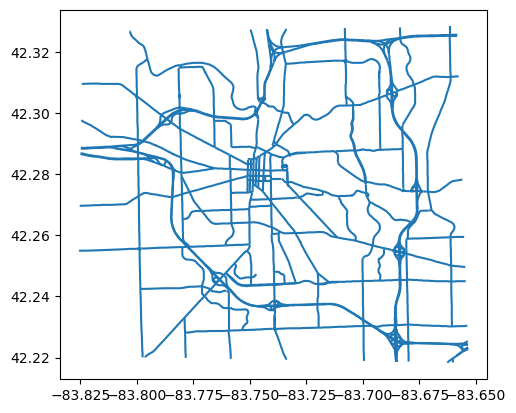

In [59]:
AA.plot()

In [35]:
AA

,fid,seg_length,posted_spe,aadt,lanes,geometry,end1_coord,end2_coord
0,4803,0.19,55,12605,3,"LINESTRING (-83.74491 42.30368, -83.74487 42.3...",0,0
1,5011,0.40,25,1628,2,"LINESTRING (-83.75845 42.29633, -83.75859 42.2...",0,0
2,5013,0.01,35,6033,3,"LINESTRING (-83.70721 42.30509, -83.70721 42.3...",0,0
3,5014,0.29,70,16670,2,"LINESTRING (-83.79114 42.29503, -83.79102 42.2...",0,0
4,5029,0.17,35,3560,2,"LINESTRING (-83.78103 42.30230, -83.78109 42.3...",0,0
...,...,...,...,...,...,...,...,...
818,22678,0.01,35,8770,1,"LINESTRING (-83.80012 42.30566, -83.80010 42.3...",0,0
819,22681,0.03,35,7848,1,"LINESTRING (-83.74401 42.30481, -83.74380 42.3...",0,0
820,22683,0.01,35,3678,1,"LINESTRING (-83.80019 42.30559, -83.80018 42.3...",0,0
821,22696,0.03,35,3678,2,"LINESTRING (-83.70678 42.30504, -83.70679 42.3...",0,0


In [48]:
AA['end1_coord'] = 0
AA['end2_coord'] = 0
for i, row in AA.iterrows():
    AA.loc[i,'end1_coord'] = zip(round(row['geometry'].coords[0][0],4),round(row['geometry'].coords[0][1],4))
    #AA.loc[i,'end2_coord'] = ((round(row['geometry'].coords[-1][0],4),(round(row['geometry'].coords[-1][1],4))

TypeError: 'float' object is not iterable

In [23]:
AA

,fid,seg_length,posted_spe,aadt,lanes,geometry,end1_coord
0,4803,0.19,55,12605,3,"LINESTRING (-83.74491 42.30368, -83.74487 42.3...",0
1,5011,0.40,25,1628,2,"LINESTRING (-83.75845 42.29633, -83.75859 42.2...",0
2,5013,0.01,35,6033,3,"LINESTRING (-83.70721 42.30509, -83.70721 42.3...",0
3,5014,0.29,70,16670,2,"LINESTRING (-83.79114 42.29503, -83.79102 42.2...",0
4,5029,0.17,35,3560,2,"LINESTRING (-83.78103 42.30230, -83.78109 42.3...",0
...,...,...,...,...,...,...,...
818,22678,0.01,35,8770,1,"LINESTRING (-83.80012 42.30566, -83.80010 42.3...",0
819,22681,0.03,35,7848,1,"LINESTRING (-83.74401 42.30481, -83.74380 42.3...",0
820,22683,0.01,35,3678,1,"LINESTRING (-83.80019 42.30559, -83.80018 42.3...",0
821,22696,0.03,35,3678,2,"LINESTRING (-83.70678 42.30504, -83.70679 42.3...",0


In [24]:
round(4.12345678,4)

4.1235

In [26]:
69*0.0001*1600

11.040000000000001

In [52]:
from shapely.wkt import loads
import re

simpledec = re.compile(r"\d*\.\d+")
def mround(match):
    return "{:.3f}".format(float(match.group()))

AA.geometry = AA.geometry.apply(lambda x: loads(re.sub(simpledec, mround, x.wkt)))


In [53]:
AA

,fid,seg_length,posted_spe,aadt,lanes,geometry,end1_coord,end2_coord
0,4803,0.19,55,12605,3,"LINESTRING (-83.74500 42.30400, -83.74500 42.3...",0,0
1,5011,0.40,25,1628,2,"LINESTRING (-83.75800 42.29600, -83.75900 42.2...",0,0
2,5013,0.01,35,6033,3,"LINESTRING (-83.70700 42.30500, -83.70700 42.3...",0,0
3,5014,0.29,70,16670,2,"LINESTRING (-83.79100 42.29500, -83.79100 42.2...",0,0
4,5029,0.17,35,3560,2,"LINESTRING (-83.78100 42.30200, -83.78100 42.3...",0,0
...,...,...,...,...,...,...,...,...
818,22678,0.01,35,8770,1,"LINESTRING (-83.80000 42.30600, -83.80000 42.3...",0,0
819,22681,0.03,35,7848,1,"LINESTRING (-83.74400 42.30500, -83.74400 42.3...",0,0
820,22683,0.01,35,3678,1,"LINESTRING (-83.80000 42.30600, -83.80000 42.3...",0,0
821,22696,0.03,35,3678,2,"LINESTRING (-83.70700 42.30500, -83.70700 42.3...",0,0


In [95]:
from shapely.geometry import Point

In [99]:
AA = gpd.read_file('AA_Map.geojson')

In [102]:
AN = set()
for i, row in AA.iterrows():
    # end1
    lat1 = round(row['geometry'].coords[0][0],3)
    lon1 = round(row['geometry'].coords[0][1],3)
    point1 = Point(lat1, lon1)
    AA.loc[i, 'end1_point'] = point1
    AN.add(point1)
    # end2
    lat2 = round(row['geometry'].coords[-1][0],3)
    lon2 = round(row['geometry'].coords[-1][1],3)
    point2 = Point(lat2, lon2)
    AA.loc[i, 'end2_point'] = point2
    AN.add(point2)

In [105]:
AN = list(AN)

In [107]:
import pandas as pd

In [109]:
temp_pd = pd.DataFrame(AN)

In [115]:
temp_pd = temp_pd.rename(columns={0: "geometry"})

In [117]:
temp_pd['node_id'] = temp_pd.index

In [118]:
temp_pd

,geometry,node_id
0,POINT (-83.66 42.22),0
1,POINT (-83.78100000000001 42.316),1
2,POINT (-83.65300000000001 42.223),2
3,POINT (-83.77800000000001 42.256),3
4,POINT (-83.76600000000001 42.282),4
...,...,...
416,POINT (-83.77200000000001 42.268),416
417,POINT (-83.746 42.304),417
418,POINT (-83.771 42.243),418
419,POINT (-83.73399999999999 42.328),419


In [119]:
AA_nodes = gpd.GeoDataFrame(temp_pd,
                          geometry='geometry',
                          crs='epsg:4326')

In [125]:
AA_nodes.head(3)

,geometry,node_id
0,POINT (-83.66000 42.22000),0
1,POINT (-83.78100 42.31600),1
2,POINT (-83.65300 42.22300),2


In [124]:
AA.head(3)

,fid,seg_length,posted_spe,aadt,lanes,geometry,end1_point,end2_point
0,4803,0.19,55,12605,3,"LINESTRING (-83.74491 42.30368, -83.74487 42.3...",POINT (-83.745 42.304),POINT (-83.744 42.306)
1,5011,0.40,25,1628,2,"LINESTRING (-83.75845 42.29633, -83.75859 42.2...",POINT (-83.758 42.296),POINT (-83.76600000000001 42.297)
2,5013,0.01,35,6033,3,"LINESTRING (-83.70721 42.30509, -83.70721 42.3...",POINT (-83.70699999999999 42.305),POINT (-83.708 42.305)


In [127]:
AA_wNode = AA.merge(AA_nodes, left_on='end1_point', right_on='geometry',
          suffixes=('_left', '_right'))

In [128]:
AA_wNode.head(3)

,fid,seg_length,posted_spe,aadt,lanes,geometry_left,end1_point,end2_point,geometry_right,node_id
0,4803,0.19000,55,12605,3,"LINESTRING (-83.74491 42.30368, -83.74487 42.3...",POINT (-83.745 42.304),POINT (-83.744 42.306),POINT (-83.74500 42.30400),119
1,5572,0.01000,55,12605,2,"LINESTRING (-83.74501 42.30355, -83.74498 42.3...",POINT (-83.745 42.304),POINT (-83.745 42.304),POINT (-83.74500 42.30400),119
2,8301,0.00987,25,7692,2,"LINESTRING (-83.74503 42.30361, -83.74498 42.3...",POINT (-83.745 42.304),POINT (-83.745 42.304),POINT (-83.74500 42.30400),119


In [131]:
AA_wNode = AA_wNode.rename(columns={'node_id': 'node1_id'})
AA_wNode.head(3)

,fid,seg_length,posted_spe,aadt,lanes,geometry_left,end1_point,end2_point,geometry_right,node1_id
0,4803,0.19000,55,12605,3,"LINESTRING (-83.74491 42.30368, -83.74487 42.3...",POINT (-83.745 42.304),POINT (-83.744 42.306),POINT (-83.74500 42.30400),119
1,5572,0.01000,55,12605,2,"LINESTRING (-83.74501 42.30355, -83.74498 42.3...",POINT (-83.745 42.304),POINT (-83.745 42.304),POINT (-83.74500 42.30400),119
2,8301,0.00987,25,7692,2,"LINESTRING (-83.74503 42.30361, -83.74498 42.3...",POINT (-83.745 42.304),POINT (-83.745 42.304),POINT (-83.74500 42.30400),119


In [133]:
AA_wNode = AA_wNode.drop(columns=['end1_point', 'geometry_right'])
AA_wNode.head(3)

,fid,seg_length,posted_spe,aadt,lanes,geometry_left,end2_point,node1_id
0,4803,0.19000,55,12605,3,"LINESTRING (-83.74491 42.30368, -83.74487 42.3...",POINT (-83.744 42.306),119
1,5572,0.01000,55,12605,2,"LINESTRING (-83.74501 42.30355, -83.74498 42.3...",POINT (-83.745 42.304),119
2,8301,0.00987,25,7692,2,"LINESTRING (-83.74503 42.30361, -83.74498 42.3...",POINT (-83.745 42.304),119


In [135]:
AA_wNode = AA_wNode.merge(AA_nodes, left_on='end2_point', right_on='geometry',
          suffixes=('_left', '_right'))
AA_wNode.head(3)

,fid,seg_length,posted_spe,aadt,lanes,geometry_left,end2_point,node1_id,geometry,node_id
0,4803,0.19,55,12605,3,"LINESTRING (-83.74491 42.30368, -83.74487 42.3...",POINT (-83.744 42.306),119,POINT (-83.74400 42.30600),133
1,9072,0.03,35,3346,2,"LINESTRING (-83.74336 42.30504, -83.74336 42.3...",POINT (-83.744 42.306),309,POINT (-83.74400 42.30600),133
2,5572,0.01,55,12605,2,"LINESTRING (-83.74501 42.30355, -83.74498 42.3...",POINT (-83.745 42.304),119,POINT (-83.74500 42.30400),119


In [139]:
AA_wNode = AA_wNode.drop(columns=['end2_point', 'geometry']).rename(columns={'node_id': 'node2_id','geometry_left':'geometry'})

In [140]:
AA_wNode.head(3)

,fid,seg_length,posted_spe,aadt,lanes,geometry,node1_id,node2_id
0,4803,0.19,55,12605,3,"LINESTRING (-83.74491 42.30368, -83.74487 42.3...",119,133
1,9072,0.03,35,3346,2,"LINESTRING (-83.74336 42.30504, -83.74336 42.3...",309,133
2,5572,0.01,55,12605,2,"LINESTRING (-83.74501 42.30355, -83.74498 42.3...",119,119


In [142]:
AA_wNode_Clean = AA_wNode[AA_wNode['node1_id']!=AA_wNode['node2_id']]

In [145]:
AA_wNode_Clean = gpd.GeoDataFrame(AA_wNode_Clean,
                          geometry='geometry',
                          crs='epsg:4326')

<Axes: >

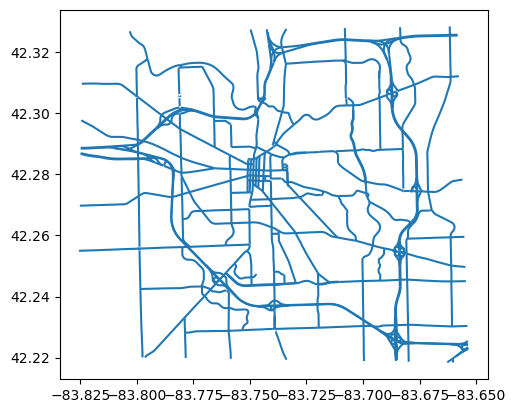

In [146]:
AA_wNode_Clean.plot()

In [147]:
AA_wNode_Clean.to_file("AA_Map_5.geojson", driver="GeoJSON")

In [150]:
AA_wNode_Clean = AA_wNode_Clean.rename(columns={'fid': "road_id",'seg_length':'length','posted_spe':'max_speed'})

In [151]:
AA_wNode_Clean.head(3)

,road_id,length,max_speed,aadt,lanes,geometry,node1_id,node2_id
0,4803,0.19,55,12605,3,"LINESTRING (-83.74491 42.30368, -83.74487 42.3...",119,133
1,9072,0.03,35,3346,2,"LINESTRING (-83.74336 42.30504, -83.74336 42.3...",309,133
4,9066,0.08,25,7692,2,"LINESTRING (-83.74628 42.30430, -83.74613 42.3...",417,119


In [158]:
AA_nodes.head(3)

,geometry,node_id
0,POINT (-83.66000 42.22000),0
1,POINT (-83.78100 42.31600),1
2,POINT (-83.65300 42.22300),2


In [159]:
AA_wNode_Clean.to_file("AA_Map_Final.gpkg", layer='edges', driver="GPKG")
AA_nodes.to_file("AA_Map_Final.gpkg", layer='nodes', driver="GPKG")